<a href="https://colab.research.google.com/github/DangMinh21/CS114.L22.KHCL/blob/main/sarcasm_detection/sarscam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [75]:
data1 = pd.read_json('/content/drive/MyDrive/Colab Notebooks/SarcasmDetection/Sarcasm_Headlines_Dataset.json', lines=True)
data2 = pd.read_json('/content/drive/MyDrive/Colab Notebooks/SarcasmDetection/Sarcasm_Headlines_Dataset_v2.json', lines=True)

In [76]:
print('Shape: ', data1.shape)
data1.head()

Shape:  (26709, 3)


,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [77]:
print('Shape: ', data2.shape)
data2.head()

Shape:  (28619, 3)


,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [78]:
data2_reverse = data2[data2.columns[::-1]]
data2_reverse.head()

,article_link,headline,is_sarcastic
0,https://www.theonion.com/thirtysomething-scien...,thirtysomething scientists unveil doomsday clo...,1
1,https://www.huffingtonpost.com/entry/donna-edw...,dem rep. totally nails why congress is falling...,0
2,https://www.huffingtonpost.com/entry/eat-your-...,eat your veggies: 9 deliciously different recipes,0
3,https://local.theonion.com/inclement-weather-p...,inclement weather prevents liar from getting t...,1
4,https://www.theonion.com/mother-comes-pretty-c...,mother comes pretty close to using word 'strea...,1


In [79]:
data_all = pd.concat([data1, data2_reverse], ignore_index=True)
data_all.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [80]:
print('Shape: ', data_all.shape)
data_all.describe()

Shape:  (55328, 3)


,is_sarcastic
count,55328.000000
mean,0.458321
std,0.498264
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [81]:
data_all.drop(['article_link'], axis=1, inplace=True)
data_all.tail()

,headline,is_sarcastic
55323,jews to celebrate rosh hashasha or something,1
55324,internal affairs investigator disappointed con...,1
55325,the most beautiful acceptance speech this week...,0
55326,mars probe destroyed by orbiting spielberg-gat...,1
55327,dad clarifies this not a food stop,1


In [82]:
headlines = data_all['headline']
labels = data_all['is_sarcastic']

In [83]:
x_train, x_test, y_train, y_test = train_test_split(headlines, labels, train_size = 0.8, random_state = 42)

In [84]:
count_vec = CountVectorizer()
x_train_count = count_vec.fit_transform(x_train)
x_test_count = count_vec.transform(x_test)
print('Shape of X train: ', x_train_count.shape)
print('Shape of X test: ', x_test_count.shape)

Shape of X train:  (44262, 25688)
Shape of X test:  (11066, 25688)


In [85]:
tf_transformer = TfidfTransformer(use_idf=True)
x_train_tf_idf = tf_transformer.fit_transform(x_train_count)
x_test_tf_idf = tf_transformer.transform(x_test_count)

In [86]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_tf_idf, y_train)
predict = model.predict(x_test_tf_idf)

In [87]:
print(classification_report(y_test, predict))


              precision    recall  f1-score   support

           0       0.89      0.90      0.89      5878
           1       0.89      0.87      0.88      5188

    accuracy                           0.89     11066
   macro avg       0.89      0.89      0.89     11066
weighted avg       0.89      0.89      0.89     11066



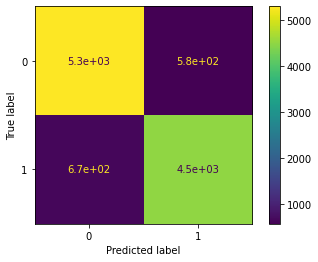

In [88]:
plot_confusion_matrix(model, x_test__tf_idf, y_test)